## Test for profile fit

In [9]:
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0.1, 3, 181)

# Taking a look at the simulation images

In [10]:
i = 30
# Ineteresting ones 9-10-30

(233, 256, 256)


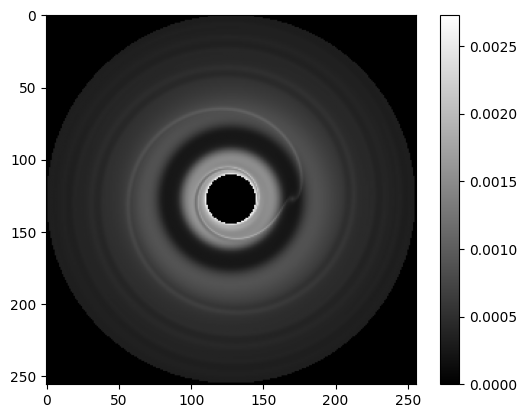

In [11]:
# Here goes the npy file with the symulation density profiles
img = np.load("../profiles/dens_test.npy")
print(img.shape)
plt.imshow(img[i], cmap="grey")
plt.colorbar()
plt.show()


# Simulation radial profile

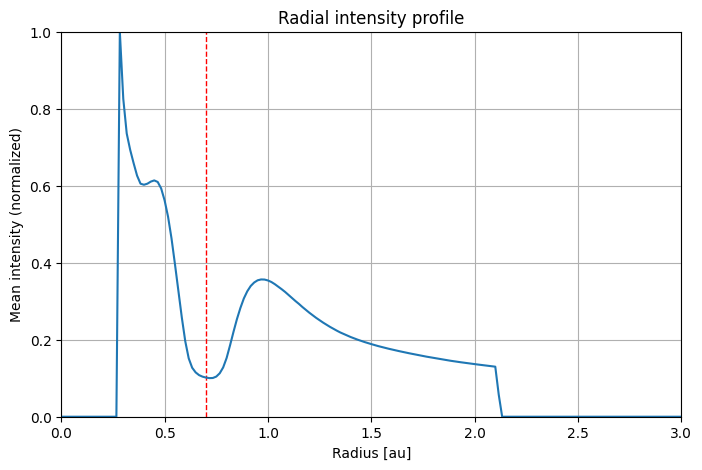

In [12]:
# Center coordinates
ny, nx = img[i].shape
y, x = np.indices((ny, nx))
center_x = (nx - 1) / 2
center_y = (ny - 1) / 2

# Radial distance from the center
r_dist = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Convert to integer for binning
r_int = r_dist.astype(int)

# Calculate the radial profile
tbin = np.bincount(r_int.ravel(), img[i].ravel())
nr = np.bincount(r_int.ravel())
sim_profile = tbin / np.maximum(nr, 1)

# Normalize the radial profile
sim_profile /= np.max(sim_profile)

# Convert pixel radius to AU
max_radius_pixel = np.max(r_int)
total_au = 3.0
au_per_pixel = total_au / max_radius_pixel
radii_au = np.arange(len(sim_profile)) * au_per_pixel

# Possible radious of the planet in AU
planet_radius_au = 0.7

# Plot
plt.figure(figsize=(8, 5))

plt.axvline(planet_radius_au,
            color='red',
            linestyle='--',
            linewidth=1)

plt.xlim(0, total_au)
plt.ylim(0, 1)
plt.plot(radii_au, sim_profile)
plt.xlabel("Radius [au]")
plt.ylabel("Mean intensity (normalized)")
plt.title("Radial intensity profile")
plt.grid(True)
plt.show()


# Syntethic profile

In [13]:
# variable parameters
r_g = 0.7
sigma = 0.15
f = 0.8

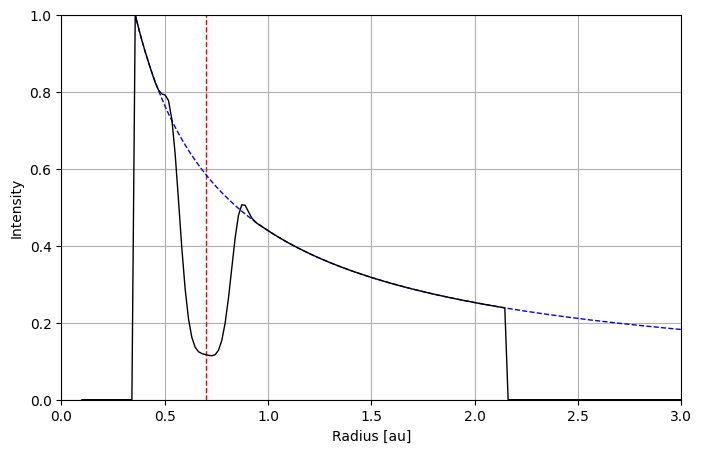

In [14]:
# fixed parameters
i_zero = 1
gam = 0.8
R_cutL = 0.35
R_cutR = 2.15

# Semi-fixed parameters
c = 0.35
pln_height = 0.1
pln_sigma = 0.3

# derived parameters
r_sinc = (f / 3.) * (np.pi * ((r - r_g) / sigma))**2

# Calculate the radial intensity profile
powerlaw = i_zero * ((r / r_g)**(-gam))

# Calculate the gap and bump factors
sinc = np.sin(r_sinc) / r_sinc
gauss = np.exp((-(r - r_g)**4) / (2 * sigma**4))

# Calculate the bump factor for the planet
planet = np.exp((-(r - r_g)**2) / (2 * (sigma * pln_sigma)**2))

# Cut factors
L_cut_factor = (r >= R_cutL).astype(float)
R_cut_factor = (r <= R_cutR).astype(float)

# Time to tighten all together
gap_factor = (1 - f * (sinc * gauss))
bump_factor = (1 + (f * pln_height) * planet)

# Combine the power law with the gap and bump factors
syn_profile = powerlaw * gap_factor * L_cut_factor * R_cut_factor

# Normalize the power law
powerlaw /= np.max(syn_profile)

# Normalize the profile
syn_profile /= np.max(syn_profile)

# Plot
plt.figure(figsize=(8, 5))

plt.axvline(planet_radius_au,
            color='red',
            linestyle='--',
            linewidth=1)

plt.plot(
    r,
    powerlaw,
    color="blue",
    linewidth=1,
    linestyle="--"
)

plt.plot(
    r,
    syn_profile,
    color="black",
    linewidth=1,
)

plt.ylim(0, 1)
plt.xlim(0, total_au)
plt.grid(True)
plt.xlabel("Radius [au]")
plt.ylabel("Intensity")

plt.show()

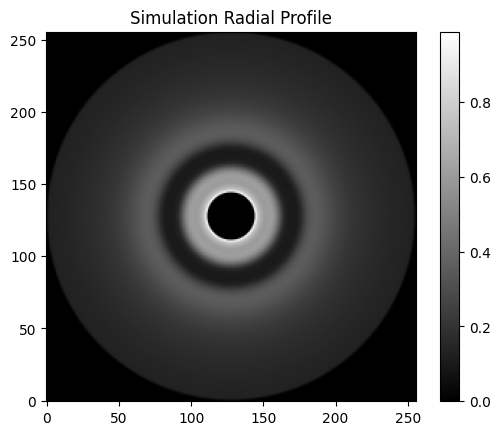

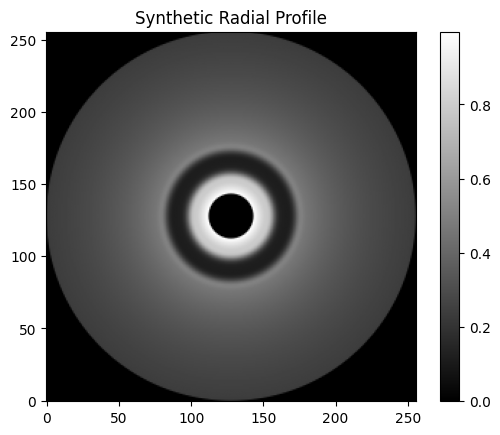

In [15]:
# Simulation radial profile
image_size = 256

y, x = np.indices((image_size, image_size))
center = (image_size - 1) / 2

# Calcola mappa radiale 2D
rad = np.sqrt((x - center)**2 + (y - center)**2)

# Rescalare rad in AU
rad = rad / np.max(rad) * np.max(radii_au)

# Interpolazione corretta
image_flat = np.interp(rad.ravel(), radii_au, sim_profile, left=0, right=0)
image = image_flat.reshape((image_size, image_size))

# Plot
plt.title("Simulation Radial Profile")
plt.imshow(image, origin='lower', cmap='grey')
plt.colorbar()
plt.show()

# Synthetic radial profile
y, x = np.indices((image_size, image_size))
center = (image_size - 1) / 2

# Calcola mappa radiale 2D
rad = np.sqrt((x - center)**2 + (y - center)**2)

# Rescalare rad in AU
rad = rad / np.max(rad) * np.max(radii_au)

# Interpolazione corretta
image_flat = np.interp(rad.ravel(), radii_au, syn_profile, left=0, right=0)
image = image_flat.reshape((image_size, image_size))

# Plot
plt.title("Synthetic Radial Profile")
plt.imshow(image, origin='lower', cmap='grey')
plt.colorbar()
plt.show()
